**Task-05**: CREDIT CARD FRAUD DETECTION

**Author**: Pula gayasree

**Batch**: November-December

**Domain**: Data Science

**Aim**: To perform a Credit card fraud detection that helps to identify and prevent unauthorized or fraudulent transactions using advanced algorithms and data analysis.
"""


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [4]:
df = pd.read_csv('/content/Pula.gayasreecreditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17505 entries, 0 to 17504
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17505 non-null  int64  
 1   V1      17505 non-null  float64
 2   V2      17505 non-null  float64
 3   V3      17505 non-null  float64
 4   V4      17505 non-null  float64
 5   V5      17505 non-null  float64
 6   V6      17505 non-null  float64
 7   V7      17505 non-null  float64
 8   V8      17505 non-null  float64
 9   V9      17505 non-null  float64
 10  V10     17505 non-null  float64
 11  V11     17505 non-null  float64
 12  V12     17505 non-null  float64
 13  V13     17505 non-null  float64
 14  V14     17505 non-null  float64
 15  V15     17505 non-null  float64
 16  V16     17505 non-null  float64
 17  V17     17505 non-null  float64
 18  V18     17505 non-null  float64
 19  V19     17505 non-null  float64
 20  V20     17504 non-null  float64
 21  V21     17504 non-null  float64
 22

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
df['Class'].unique()

array([ 0.,  1., nan])

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,17505.0,13551.932248,9708.562338,0.000000,3764.000000,11905.000000,23049.000000,28777.000000
V1,17505.0,-0.252908,1.902725,-30.552380,-0.964711,-0.312138,1.162544,1.960497
V2,17505.0,0.266305,1.513770,-40.978852,-0.297041,0.242082,0.882482,16.713389
V3,17505.0,0.777677,1.775533,-31.103685,0.338816,0.922017,1.558261,4.101716
V4,17505.0,0.297187,1.483059,-5.172595,-0.626582,0.234986,1.163006,11.927512
V5,17505.0,-0.139561,1.429499,-32.092129,-0.722373,-0.188225,0.350886,34.099309
V6,17505.0,0.101768,1.331392,-23.496714,-0.651489,-0.168952,0.497045,21.393069
V7,17505.0,-0.149161,1.348793,-26.548144,-0.597054,-0.074964,0.448635,34.303177
V8,17505.0,0.013150,1.325779,-23.632502,-0.176683,0.019469,0.273304,20.007208
V9,17505.0,0.756787,1.273589,-7.175097,-0.074848,0.755407,1.495627,10.392889


"""Feature Engineering"""

In [9]:
df['hour']= round(df['Time']/3600)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.0


In [10]:
class_count = df['Class'].value_counts() #Count total number of rows of each classes.
class_count

0.0    17423
1.0       81
Name: Class, dtype: int64

In [12]:
duplicated_count = df.duplicated().sum()
duplicated_count


55

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
fig = plt.figure(figsize=(10, 7))
labels = class_count.index
data = class_count.values

<Figure size 1000x700 with 0 Axes>

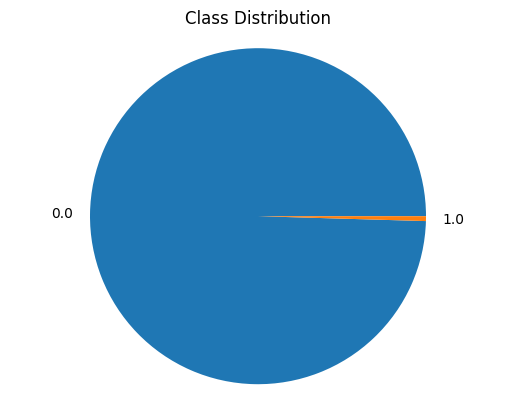

In [15]:
plt.pie(data, labels=labels)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()

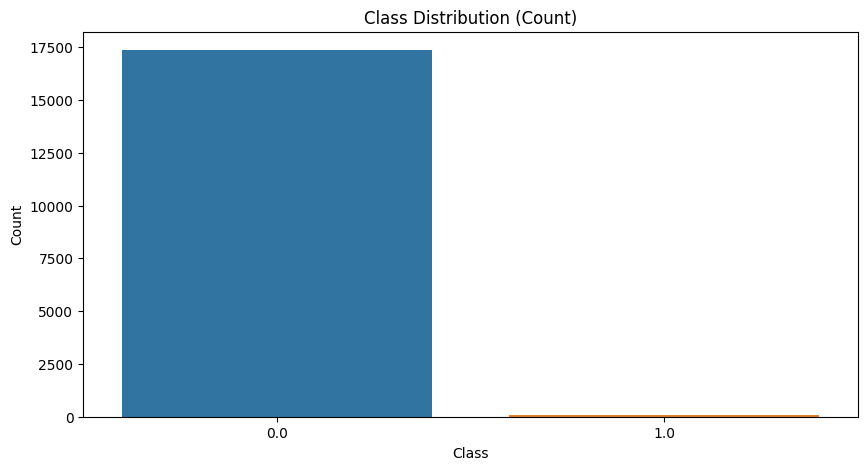

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x='Class')
plt.title('Class Distribution (Count)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<Axes: >

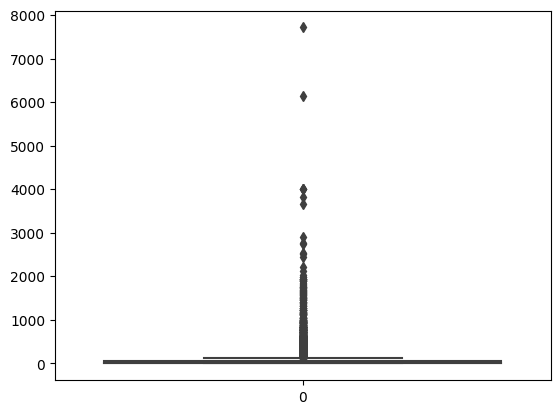

In [17]:
sns.boxplot(df['Amount'])


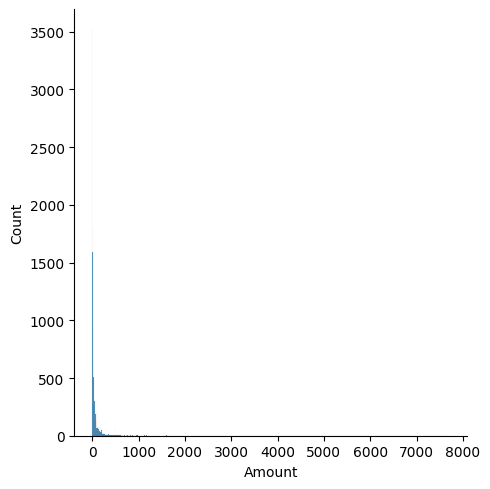

In [18]:
sns.displot(df['Amount']) #plotting distribution plot to check skewness of our data
plt.show()

In [19]:
df['Amount'].skew()

12.314616616750625

In [20]:
pt = PowerTransformer(method='yeo-johnson')   #power transformer is use for reduction of skewness of our data
df['Amount'] = pt.fit_transform(df[['Amount']])
df['Amount'].skew()

0.01803198515539473

<ipython-input-21-ae7ad042f4b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


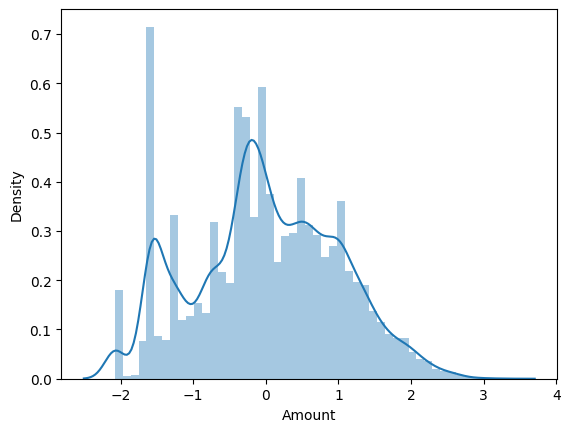

In [21]:
sns.distplot(df['Amount'])
plt.show()

In [22]:
scaler = StandardScaler()

In [23]:
df['Amount'] = scaler.fit_transform(df[['Amount']])

<Axes: >

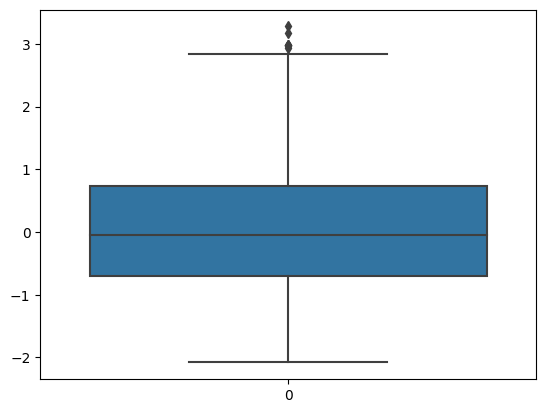

In [24]:
sns.boxplot(df['Amount'])


In [25]:
outliers = df['Amount'] > 3 # counting outliers
outliers.count()

17450

In [26]:
df['Amount']=df['Amount'] < 3 #dropping outliers
class_count


0.0    17423
1.0       81
Name: Class, dtype: int64

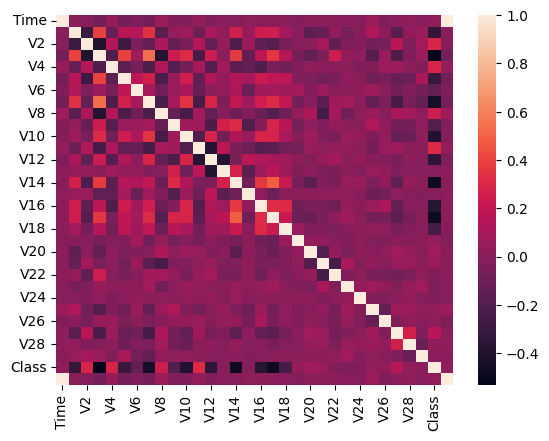

In [27]:
sns.heatmap(df.corr())    # checking correlation of each feature to our Label
plt.show()

In [28]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'hour'],
      dtype='object')

In [29]:
x = df.drop(columns = ['Class'])
y = df['Class']

In [30]:
import numpy as np

In [31]:
# Assuming y contains NaN values
nan_indices = np.isnan(y)
x = x[~nan_indices]
y = y[~nan_indices]

In [32]:
# Now, you can proceed with the train-test split
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=101, stratify=y)


"""Logistic Regression"""

In [34]:
model = LogisticRegression(class_weight = 'balanced') #creating model

In [35]:
model.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [36]:
train_pred = model.predict(x_train)

In [37]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13894
         1.0       0.23      0.95      0.38        65

    accuracy                           0.99     13959
   macro avg       0.62      0.97      0.68     13959
weighted avg       1.00      0.99      0.99     13959



In [38]:
test_pred = model.predict(x_test)

In [39]:
print(classification_report(y_test,test_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3474
         1.0       0.22      0.94      0.36        16

    accuracy                           0.98      3490
   macro avg       0.61      0.96      0.68      3490
weighted avg       1.00      0.98      0.99      3490



"""Random classifier Forest"""


In [40]:
model_r = RandomForestClassifier(class_weight = 'balanced')

In [41]:
model_r.fit(x_train,y_train)


RandomForestClassifier(class_weight='balanced')

In [42]:
from sklearn.ensemble import RandomForestClassifier
model_r = RandomForestClassifier()
model_r.fit(x_train, y_train)
trainpred = model_r.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, trainpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13894
         1.0       1.00      1.00      1.00        65

    accuracy                           1.00     13959
   macro avg       1.00      1.00      1.00     13959
weighted avg       1.00      1.00      1.00     13959



In [43]:
testpred = model_r.predict(x_test)


In [44]:
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3474
         1.0       1.00      0.88      0.93        16

    accuracy                           1.00      3490
   macro avg       1.00      0.94      0.97      3490
weighted avg       1.00      1.00      1.00      3490



"""XGBoost"""

In [45]:
model_X = xgb.XGBClassifier()
model_X.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
train_x_pred = model_X.predict(x_train)

In [47]:
print(classification_report(y_train,train_x_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13894
         1.0       1.00      1.00      1.00        65

    accuracy                           1.00     13959
   macro avg       1.00      1.00      1.00     13959
weighted avg       1.00      1.00      1.00     13959



In [48]:
test_x_pred = model_r.predict(x_test)


In [49]:
print(classification_report(y_test,test_x_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3474
         1.0       1.00      0.88      0.93        16

    accuracy                           1.00      3490
   macro avg       1.00      0.94      0.97      3490
weighted avg       1.00      1.00      1.00      3490

